In [4]:
import os
import math
import ccdproc
import warnings
import radonCenter
import nmf_imaging
import numpy as np
import pandas as pd
import scipy.ndimage
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,SymLogNorm
from multiprocess import Pool
from astropy import wcs
from astropy import stats
import astropy.units as u
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.nddata import Cutout2D
from astropy import convolution as conv
from astropy.visualization import astropy_mpl_style
from astropy.utils.exceptions import AstropyWarning
from pyklip.klip import rotate as pyklipRotate
#from gpunmf import *

In [2]:
from nmf_kl import *

In [3]:
ncores=8

In [44]:
trgdir = '/Users/saikrishanth/Desktop/OneDrive - University of Arizona/STIS/WEDGEA1_0'
refdir = '/Users/saikrishanth/Desktop/OneDrive - University of Arizona/STIS/WEDGEA1_0'

In [60]:
trgdir = '/Users/saikrishanth/Desktop/OneDrive - University of Arizona/STIS/WEDGEA0_6'
refdir = '/Users/saikrishanth/Desktop/OneDrive - University of Arizona/STIS/WEDGEA0_6'

In [20]:
trgdir = '/Users/saikrishanth/Downloads/TW_HYD'
refdir = '/Users/saikrishanth/Downloads/TW_HYD_REF'

In [21]:
files = [f for f in os.listdir('/Users/saikrishanth/Downloads/TW_HYD')]

In [6]:
files

['of1101010_flt.fits',
 '.DS_Store',
 'of1104010_flt.fits',
 'of1102010_flt.fits',
 'of1101030_flt.fits',
 'of1102040_flt.fits',
 'of1102020_flt.fits',
 'of1104030_flt.fits',
 'of1101020_flt.fits',
 'of1104040_flt.fits',
 'of1101040_flt.fits',
 'of1102030_flt.fits',
 'of1104020_flt.fits']

In [7]:
files = ['of1101010_flt.fits',
 'of1104010_flt.fits',
 'of1102010_flt.fits',
 'of1101030_flt.fits',
 'of1102040_flt.fits',
 'of1102020_flt.fits',
 'of1104030_flt.fits',
 'of1101020_flt.fits',
 'of1104040_flt.fits',
 'of1101040_flt.fits',
 'of1102030_flt.fits',
 'of1104020_flt.fits']

In [8]:
#files = [f for f in os.listdir('/Users/saikrishanth/Downloads/TW_HYD')]
#files = [f for f in grady]
trgfiles = []
for i in files:
    path = '/Users/saikrishanth/Downloads/TW_HYD/'+i
    hdul = fits.open(path)
    tname = hdul[0].header['TARGNAME']
    aname = hdul[0].header['PROPAPER']
    time = hdul[1].header['EXPTIME']
    #tdsr = hdul[0].header['TARDESCR']
    #pid = hdul[0].header['PROPOSID']
    print(tname,aname,time,i)

V-TW-HYA WEDGEA1.0 508.0 of1101010_flt.fits
V-TW-HYA WEDGEA1.0 508.0 of1104010_flt.fits
V-TW-HYA WEDGEA1.0 0.768225 of1102010_flt.fits
V-TW-HYA BAR10 110.0 of1101030_flt.fits
V-TW-HYA BAR5 0.768225 of1102040_flt.fits
V-TW-HYA BAR10 0.768225 of1102020_flt.fits
V-TW-HYA BAR10 110.0 of1104030_flt.fits
V-TW-HYA BAR10 110.0 of1101020_flt.fits
V-TW-HYA BAR5 110.0 of1104040_flt.fits
V-TW-HYA BAR5 110.0 of1101040_flt.fits
V-TW-HYA BAR10 0.768225 of1102030_flt.fits
V-TW-HYA BAR10 110.0 of1104020_flt.fits


In [22]:
#tw_hya_w1.0
twhya10 = ['of1101010_flt.fits',
           'of1104010_flt.fits']#,
           #'of1102010_flt.fits']
HD85512 = ['of1103020_flt.fits',
             'of1103010_flt.fits']

In [6]:
medians = []
for i in refs:
    norms = []
    for j in range(len(trgs)):
        norm = np.linalg.norm(i - trgs[j])
        norms.append(norm)
    medians.append(np.median(norms))

NameError: name 'refs' is not defined

In [305]:
refs=refs/10

In [10]:
plt.imshow(refs[4])
plt.colorbar()

NameError: name 'refs' is not defined

In [61]:
#WA0.6
trgs49cet = ['odkn84030_flt.fits',
             'odkn82020_flt.fits',
             'odkn81030_flt.fits',
             'odkn82040_flt.fits',
             'odkn81040_flt.fits',
             'odkn84020_flt.fits',
             'odkn82030_flt.fits',
             'odkn81020_flt.fits',
             'odkn84040_flt.fits',
             'odkn84010_flt.fits',
             'odkn81010_flt.fits',
             'odkn82010_flt.fits']
refs49cet = ['odkn83010_flt.fits',
             'odkn83040_flt.fits',
             'odkn83020_flt.fits',
             'odkn83030_flt.fits']

In [45]:
#WA1.0
trgs49cet = ['odkn81050_flt.fits',
             'odkn81080_flt.fits',
             'odkn84080_flt.fits',
             'odkn84050_flt.fits',
             'odkn82080_flt.fits',
             'odkn82050_flt.fits',
             'odkn81070_flt.fits',
             'odkn84070_flt.fits',
             'odkn82060_flt.fits',
             'odkn81060_flt.fits',
             'odkn84060_flt.fits',
             'odkn82070_flt.fits']
trgshd377 = ['odkn41040_flt.fits',
             'odkn44040_flt.fits',
             'odkn42040_flt.fits',
             'odkn46040_flt.fits']
trgstwa25 = ['odkn27oxq_flt.fits',
             'odkn24ofq_flt.fits',
             'odkn22o5q_flt.fits',
             'odkn26osq_flt.fits',
             'odkn21nyq_flt.fits',
             'odkn23oaq_flt.fits']
refs49cet = ['odkn83060_flt.fits',
             'odkn83070_flt.fits',
             'odkn83050_flt.fits',
             'odkn83080_flt.fits']
refshd377 = ['odkn45040_flt.fits', 
             'odkn43040_flt.fits']
refstwa25 = ['odkn25020_flt.fits']

In [62]:
#Processes and target and reference frames. It is written to be parallelizable. Follows 
#"Post-processing of the HST STIS coronagraphic observations" by Ren et al. closely. Changes not advised. 
def prep_frames_parallel(filename):
    
    try:
        trgs = []
        trgs_err = []
        refs = []
        refs_err = []
        PAs = []
        fnames = []
        mask = []
        
        image_data_sc = []
        image_data_er = []
        image_data_dq = []
        
        if filename in trgfiles:
            path = os.path.join(trgdir, filename)
        elif filename in reffiles:
            path = os.path.join(refdir, filename)
            
        with fits.open(path) as hdul:
            exptimes = []
            CRPIX1 = hdul['SCI'].header['CRPIX1']
            CRPIX2 = hdul['SCI'].header['CRPIX2']
            NAXIS1 = hdul['SCI'].header['NAXIS1']
            NAXIS2 = hdul['SCI'].header['NAXIS2']
            CCDGAIN = hdul[0].header['CCDGAIN']
            wcsO = wcs.WCS(hdul[1].header)
            rot_angle = np.rad2deg(math.atan2(wcsO.wcs.cd[1][0], wcsO.wcs.cd[0][0]))
            wcspa = 180*np.sign(rot_angle) - rot_angle
            
            for i in range(1,len(hdul),3):
                exptimes.append(hdul[i].header['EXPTIME'])
                
            exptimes = np.array(exptimes)
            medexp = np.median(exptimes)
            
            for i in range(1,len(hdul),3):
                EXPTIME = hdul[i].header['EXPTIME']
                if EXPTIME > medexp:
                    continue
                image_data_sc.append(hdul[i].data)
                image_data_er.append(hdul[i+1].data)
                image_data_dq.append(hdul[i+2].data)
                
            CRPIX1a = np.zeros(len(image_data_dq))
            CRPIX2a = np.zeros(len(image_data_dq))
            
        for x in range(len(image_data_dq)): 
            
            cutframesc = Cutout2D(image_data_sc[x],(CRPIX1,CRPIX2),(500,500),wcs=None)
            cutframeer = Cutout2D(image_data_er[x],(CRPIX1,CRPIX2),(500,500),wcs=None)
            cutframedq = Cutout2D(image_data_dq[x],(CRPIX1,CRPIX2),(500,500),wcs=None)
            image_data_sc[x] = cutframesc.data
            image_data_er[x] = cutframeer.data
            image_data_dq[x] = cutframedq.data
            CRPIX1a[x],CRPIX2a[x] = cutframesc.position_cutout
            
            dq01 = np.where(image_data_dq[x]==(16 or 256 or 8192),0,1)
            dq10 = np.where(image_data_dq[x]==(16 or 256 or 8192),1,0)
            medsci = scipy.ndimage.median_filter(image_data_sc[x],size=3)
            multsciadd = np.multiply(dq10,medsci)
            multscisub = np.multiply(dq01,image_data_sc[x])
            image_data_sc[x] = np.add(multscisub,multsciadd)
            mederr = scipy.ndimage.median_filter(image_data_er[x],size=3)
            multerradd = np.multiply(dq10,mederr)
            multerrsub = np.multiply(dq01,image_data_er[x])
            image_data_er[x] = np.add(multerrsub,multerradd)
                
            for i in range(len(image_data_dq[x])):
                for j in range(len(image_data_dq[x][i])):
                    vdist  = i - CRPIX2a[x]
                    hdist  = j - CRPIX1a[x]
                    radius = math.sqrt(pow(vdist, 2) + pow(hdist, 2))
                    image_data_sc[x][i][j] = image_data_sc[x][i][j]*pow(radius, 0.5)
                
            (x_cen, y_cen) = radonCenter.searchCenter(image_data_sc[x], CRPIX1a[x], CRPIX2a[x], size_window = math.floor(NAXIS2/2),size_cost=7,theta=[45, 135]) 
        
            image_data_sc[x] = image_data_sc[x]/EXPTIME
            image_data_er[x] = image_data_er[x]/EXPTIME
            
            voff = image_data_sc[x].shape[0]/2 - y_cen 
            hoff = image_data_sc[x].shape[1]/2 - x_cen 
            
            shiftimage_data_sc = scipy.ndimage.shift(image_data_sc[x], np.array([voff, hoff]))
            shiftimage_data_er = scipy.ndimage.shift(image_data_er[x], np.array([voff, hoff]))     
            
            lh = 201 #for A1.0
            lw = 201 #for A1.0
        
            sc_data_2d = Cutout2D(shiftimage_data_sc, position=(shiftimage_data_sc.shape[1]/2,shiftimage_data_sc.shape[0]/2), size=(lh,lw), wcs=None)
            er_data_2d = Cutout2D(shiftimage_data_er, position=(shiftimage_data_er.shape[1]/2,shiftimage_data_er.shape[0]/2), size=(lh,lw), wcs=None)
        
            if filename in trgfiles:
                trgs.append(sc_data_2d.data)
                trgs_err.append(er_data_2d.data)
                PAs.append(wcspa)
                fnames.append(filename)
            elif filename in reffiles:
                refs.append(sc_data_2d.data)
                refs_err.append(er_data_2d.data)
                PAs.append(wcspa)
                fnames.append(filename)
                
    except Exception as e:
        print(e, filename)
        
    return trgs, trgs_err, refs, refs_err, PAs, fnames

In [63]:
trgfiles = trgs49cet
reffiles = refs49cet

In [64]:
%%time
warnings.simplefilter('ignore', AstropyWarning)
with Pool(ncores) as p:
    results1 = list(p.map(prep_frames_parallel, trgfiles))
    results2 = list(p.map(prep_frames_parallel, reffiles))

CPU times: user 71.7 ms, sys: 80.4 ms, total: 152 ms
Wall time: 16.4 s


In [65]:
#Extracts data we need from results in the previous cell and stores them as arrays
trgs = []
trgs_err = []
refs = []
refs_err = []
PAts = []
PArs = []
fnames = []

for i in range(len(results1)):
    for j in range(len(results1[i][0])):
        tr = results1[i][0][j]
        trgs.append(tr)
        
for i in range(len(results1)):
    for j in range(len(results1[i][1])):
        tr = results1[i][1][j]
        trgs_err.append(tr)
        
for i in range(len(results1)):
    for j in range(len(results1[i][4])):
        tr = results1[i][4][j]
        PAts.append(tr)
        
for i in range(len(results2)):
    for j in range(len(results2[i][4])):
        tr = results2[i][4][j]
        PArs.append(tr)
        
for i in range(len(results1)):
    for j in range(len(results1[i][5])):
        tr = results1[i][5][j]
        fnames.append(tr)
        
for i in range(len(results2)):
    for j in range(len(results2[i][2])):
        tr = results2[i][2][j]
        refs.append(tr)
        
for i in range(len(results2)):
    for j in range(len(results2[i][3])):
        tr = results2[i][3][j]
        refs_err.append(tr)
        
trgs = np.array(trgs)
trgs_err = np.array(trgs_err)
refs = np.array(refs)
refs_err = np.array(refs_err)

In [2]:
def occulterLocation(name_input):
    """Return the x and y locations for the default occulting positions.
    Input:
        name_input -- name of the occulter, allowed inputs: ['BAR5', 'BAR10', 
                    'WEDGEA0.6', 'WEDGEA1.0', 'WEDGEA1.8', 'WEDGEA2.0', 'WEDGEA2.5', 'WEDGEA2.8', 
                    'WEDGEB1.0', 'WEDGEB1.8', 'WEDGEB2.0', 'WEDGEB2.5', 'WEDGEB2.8']
    Output:
        x, y -- values of the locations
    """
    #The array below contains emperical postions from the public
    # STIS coronagraphic archive, measured by Bin Ren from ADS: 2017SPIE10400E..21R
    #
    #The only difference is that the values are the median of the centers
    #that are determined by fitting two lines to the diffraction spikes, rather
    #than using Radon transfrom in 2017SPIE10400E..21R
    array_name_values = np.array([
                        ['WEDGEA2.0', 311.48, 613.74],
                        ['WEDGEA1.8', 309.43, 534.17],
                        ['BAR10',     624.73, 844.17],
                        ['WEDGEB2.5', 802.73, 302.46],
                        ['WEDGEA1.0', 309.65, 213.33],
                        ['WEDGEA0.6', 307.98,  67.59],
                        ['WEDGEA2.8', 309.51, 933.82],
                        ['WEDGEB1.8', 528.05, 303.68],
                        ['WEDGEA2.5', 309.03, 813.59],
                        ['BAR5',      969.73, 697.81],
                        ['WEDGEB1.0', 214.37, 305.08],
                        ['WEDGEB2.8', 917.71, 303.47],
                        ['WEDGEB2.0', 606.84, 303.63]
                        ]) 

    names_occulters = array_name_values[:, 0]
    name = name_input.upper()
    if name not in names_occulters:
        raise ValueError(name_input + " is not a supported location by STIS.")
    else:
        return float(array_name_values[np.where(names_occulters == name), 1][0][0]), float(array_name_values[np.where(names_occulters == name), 2][0][0])

In [5]:
occulterLocation('WEDGEA1.0')

(309.65, 213.33)

In [6]:
def create_mask(width_y, width_x, occulter, hw_spikes = 1, cen_x = None, cen_y = None):
    """Make all 1's array except the diagonals where are 0's.
    Input:
        width_y: width in the y-direction. Default is None, i.e., width_y = width;
        width_x: width in the x-direction. Default is None, i.e., width_x = width;
        occulter: occulter position name, e.g. 'WEDGEA1.0';
        hw_spikes: half width of the diagonals;
        cen_x: center of the spikes in the x-direction. Default is None, i.e., cen_x = (width_x-1)/2.0;
        cen_y: center of the spikes in the y-direction. Default is None, i.e., cen_y = (width_y-1)/2.0.
    Output:
        diagonals: 2D array with properties described above.
    """   
    mask = fits.getdata('mask_STIS_coron.fits')
    #f = Cutout2D(mask, position=occulterLocation(occulter), size=(width_y,width_x), wcs=None)
    f = Cutout2D(mask, occulterLocation(occulter), size=(width_y,width_x), wcs=None)
    #f = Cutout2D(mask, position=(969.73, 697.81), size=(width_y,width_x), wcs=None)
    #f = Cutout2D(mask, position=(309.43, 534.17), size=(width_y,width_x), wcs=None)
    spikes = np.ones((width_y, width_x))
    
    if hw_spikes == 0:
        return spikes
    
    if cen_x is None:
        cen_x = (width_x - 1)/2.0
    if cen_y is None:
        cen_y = (width_y - 1)/2.0

    for y in range(width_y):
        for x in range(width_x):
            if np.abs(np.abs(x-cen_x)-np.abs(y-cen_y)) <= hw_spikes:
                spikes[y, x] = 0
    return spikes*f.data

In [8]:
mask = create_mask(137, 201, hw_spikes = 5, occulter='WEDGEA1.0')

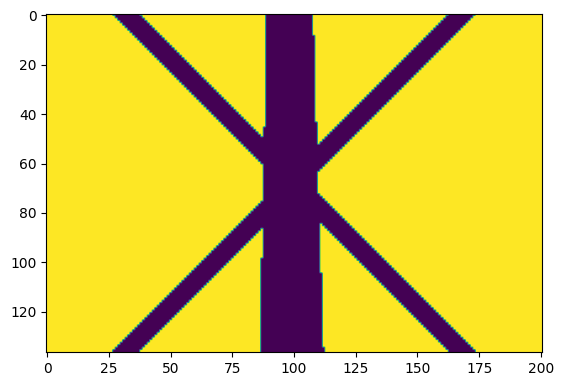

In [9]:
plt.imshow(mask)

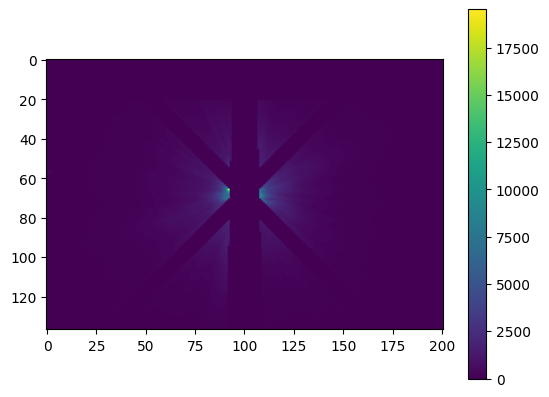

In [73]:
plt.imshow(refs[0]*mask)
plt.colorbar()

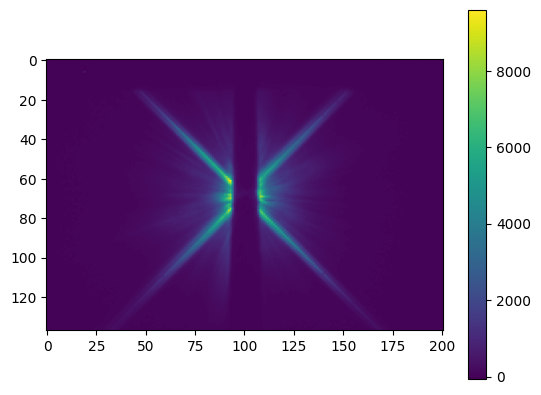

In [74]:
plt.imshow(trgs[0])
#np.where(circ_mask,np.nan,0)
plt.colorbar()

In [75]:
refs.shape

(29, 137, 201)

In [76]:
%%time
components = NMFcomponents(refs, mask = mask, n_components = 29, maxiters = 1e4, oneByOne=True)

Building components one by one...
	1 of 29
Current Chi2=177044.2918, Previous Chi2=950027720.3185, Change=99.9814% @ niters=0
Took 0.002 minutes to reach current solution.
	2 of 29
Current Chi2=177072.1759, Previous Chi2=177504.1276, Change=0.2433% @ niters=0
Current Chi2=176316.1758, Previous Chi2=176359.7269, Change=0.0247% @ niters=20
Current Chi2=175385.3514, Previous Chi2=175428.7527, Change=0.0247% @ niters=40
Current Chi2=174669.0400, Previous Chi2=174698.5293, Change=0.0169% @ niters=60
Current Chi2=174190.8961, Previous Chi2=174210.5727, Change=0.0113% @ niters=80
Current Chi2=173865.1033, Previous Chi2=173878.7767, Change=0.0079% @ niters=100
Current Chi2=173630.9877, Previous Chi2=173641.2874, Change=0.0059% @ niters=120
Current Chi2=173443.9106, Previous Chi2=173452.6048, Change=0.0050% @ niters=140
Current Chi2=173277.8294, Previous Chi2=173285.9118, Change=0.0047% @ niters=160
Current Chi2=173115.2006, Previous Chi2=173123.5248, Change=0.0048% @ niters=180
Current Chi2=17

In [77]:
%time
results = np.zeros(trgs.shape) 

for i in range(trgs.shape[0]):
    try:
        print(f"Number {i+1} of {trgs.shape[0]}")
        trg = trgs[i]
        #trg_err = trgs_err[i]
        model = NMFmodelling(trg = trg, components = components, n_components = 29, mask_components = mask, maxiters = 1e4)
        best_frac =  nmf_imaging.NMFbff(trg, model, mask) 
        result = NMFsubtraction(trg, model, mask) 
        results[i] = result
    except Exception as e:
        print(e)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs
Number 1 of 81
Current Chi2=1402575.4416, Previous Chi2=31636356.8038, Change=95.5666% @ niters=0


Current Chi2=24614.6044, Previous Chi2=24763.2825, Change=0.6004% @ niters=20
Current Chi2=23532.1355, Previous Chi2=23568.0063, Change=0.1522% @ niters=40
Current Chi2=22981.2885, Previous Chi2=23002.7913, Change=0.0935% @ niters=60
Current Chi2=22639.6282, Previous Chi2=22653.4160, Change=0.0609% @ niters=80
Current Chi2=22414.5080, Previous Chi2=22423.8355, Change=0.0416% @ niters=100
Current Chi2=22258.7410, Previous Chi2=22265.3370, Change=0.0296% @ niters=120
Current Chi2=22146.4440, Previous Chi2=22151.2882, Change=0.0219% @ niters=140
Current Chi2=22062.5700, Previous Chi2=22066.2467, Change=0.0167% @ niters=160
Current Chi2=21997.9579, Previous Chi2=22000.8302, Change=0.0131% @ niters=180
Current Chi2=21946.8162, Previous Chi2=21949.1177, Change=0.0105% @ niters=200
Current Chi2=21905.3659, Previous Chi2=21907.2512, Change=0.0086% @ niters=220
Current Chi2=21871.0718, Previous Chi2=21872.6459, Change=0.0072% @ niters=240
Current Chi2=21842.1905, Previous Chi2=21843.5266, Chang

/Users/saikrishanth/Library/CloudStorage/OneDrive-UniversityofArizona/STIS/nmf_kl.py:307: RuntimeWarning: invalid value encountered in sqrt
  trg_err = np.sqrt(trg)


Current Chi2=21732.8205, Previous Chi2=21733.4500, Change=0.0029% @ niters=380
Current Chi2=21720.8769, Previous Chi2=21721.4463, Change=0.0026% @ niters=400
Current Chi2=21710.0458, Previous Chi2=21710.5633, Change=0.0024% @ niters=420
Current Chi2=21700.1808, Previous Chi2=21700.6531, Change=0.0022% @ niters=440
Current Chi2=21691.1617, Previous Chi2=21691.5942, Change=0.0020% @ niters=460
Current Chi2=21682.8882, Previous Chi2=21683.2855, Change=0.0018% @ niters=480
Current Chi2=21675.2762, Previous Chi2=21675.6422, Change=0.0017% @ niters=500
Current Chi2=21668.2545, Previous Chi2=21668.5925, Change=0.0016% @ niters=520
Current Chi2=21661.7620, Previous Chi2=21662.0749, Change=0.0014% @ niters=540
Current Chi2=21655.7461, Previous Chi2=21656.0363, Change=0.0013% @ niters=560
Current Chi2=21650.1612, Previous Chi2=21650.4309, Change=0.0012% @ niters=580
Current Chi2=21644.9675, Previous Chi2=21645.2185, Change=0.0012% @ niters=600
Current Chi2=21640.1301, Previous Chi2=21640.3640, C

/opt/anaconda3/envs/np_veclib/lib/python3.9/site-packages/ccdproc/combiner.py:443: RuntimeWarning: All-NaN slice encountered
  medianed = median_func(data, axis=0)
/opt/anaconda3/envs/np_veclib/lib/python3.9/site-packages/astropy/stats/funcs.py:816: RuntimeWarning: All-NaN slice encountered
  data_median = func(data, axis=axis)
/opt/anaconda3/envs/np_veclib/lib/python3.9/site-packages/astropy/stats/funcs.py:822: RuntimeWarning: All-NaN slice encountered
  result = func(np.abs(data - data_median), axis=axis, overwrite_input=True)


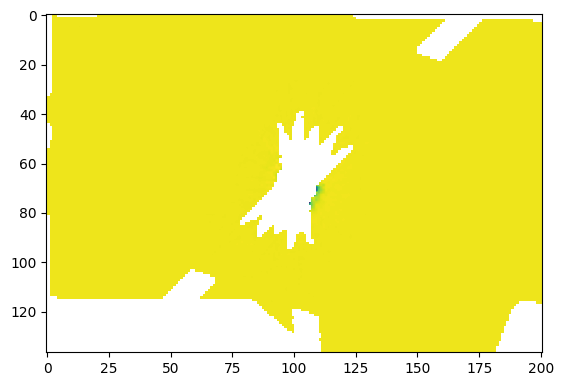

In [78]:
cresults = []
for i in results:
    clip = stats.sigma_clip(i, sigma=3, maxiters=20, stdfunc='mad_std')
    cresults.append(clip)
    
cresults = np.array(cresults)
    
nresults = []
for i,j in zip(cresults,PAts):
    rotationcenter = (i.shape[1]/2, i.shape[0]/2)
    q = pyklipRotate(i, j, rotationcenter)
    nresults.append(q)

rlist = []
for i in nresults:
    q = CCDData(i, unit='adu')
    rlist.append(q)
    
c = ccdproc.combine(rlist, method='median')
comb = c.data
plt.imshow(comb)
#hdu = fits.PrimaryHDU(c1140)
#hdu.writeto('epseri30allclean.fits', overwrite=True)

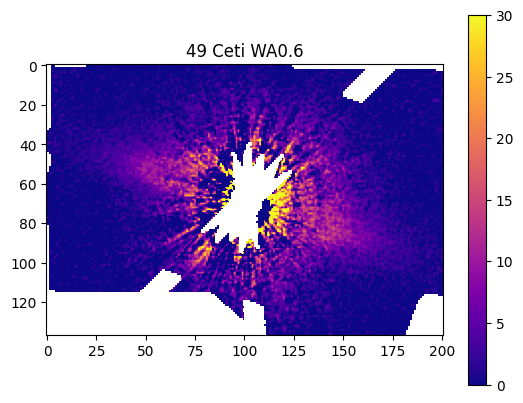

In [81]:
plt.imshow(comb, vmin=0, vmax=30, cmap='plasma')
plt.title('49 Ceti WA0.6')
plt.colorbar()

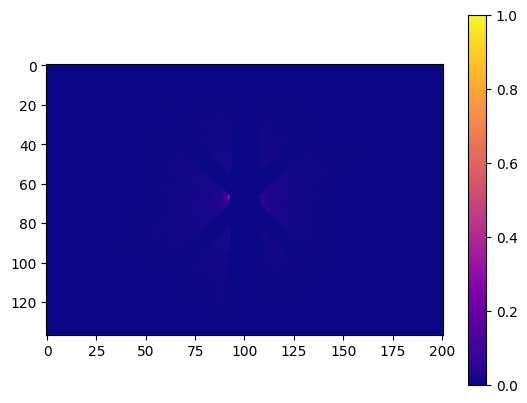

In [91]:
plt.imshow(components[1], vmin=0, vmax=1, cmap='plasma')
plt.colorbar()

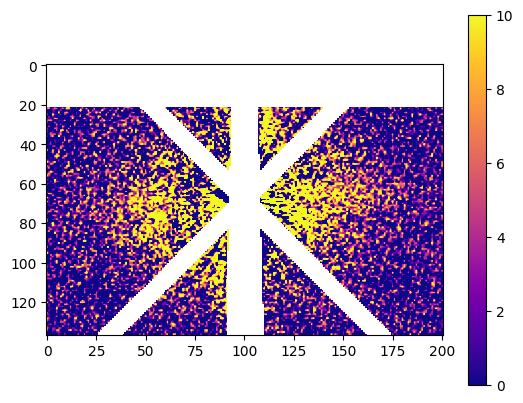

In [88]:
plt.imshow(results[80], vmin=0, vmax=10, cmap='plasma')
plt.colorbar()

In [102]:
hdul = fits.open('/Users/saikrishanth/Downloads/MAST_2024-03-27T18_19_25.483Z/MAST_2024-03-27T18_19_25.483Z/HST/N4Q803010/n4q803vpq_cal.fits')
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '12:30:07 (24/06/2009)' / Time of last modification                   
NEXTEND =                    5 / Number of standard extensions                  
DATE    = '2009-06-24T12:30:07' / date this file was written (yyyy-mm-dd)       
FILENAME= 'n4q803vpq_cal.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'NICMOS'          

In [107]:
hdul[1].header['CRPIX2']

213.72

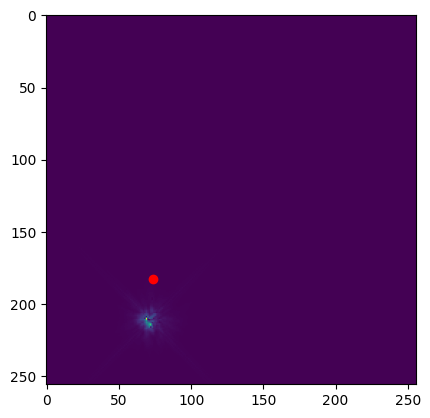

In [110]:
plt.imshow(hdul[1].data)
plt.plot(hdul[1].header['CRPIX1'],256-hdul[1].header['CRPIX1'],'ro')

In [117]:
a15 = fits.getdata('AU-MICmed15.fits')
a30 = fits.getdata('AU-MICmed30.fits')
a45 = fits.getdata('AU-MICmed45.fits')
a90 = fits.getdata('AU-MICmed90.fits')

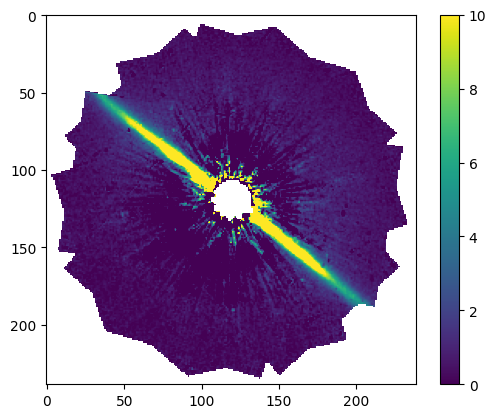

In [122]:
plt.imshow(a15, vmin=0, vmax=10)
plt.colorbar()

In [147]:
def createmask(maskshape, voff, hoff, apertureshape):

    slope = (((3.0-0.5)/2)/50)
    H = maskshape[0]
    W = maskshape[1]
    mvc = int(H/2) # mask vertical center
    mhc = int(W/2) # mask horizontal center
    
    maskFR = np.zeros(maskshape)
    avc = int ( apertureshape[0] / 2 ) # aperture Vertical center
    ahc = int ( apertureshape[1] / 2 ) # aperture Horizontal center
    maskFR[mvc-avc+1+1:mvc+avc-1,mhc-ahc+1:mhc+ahc-1] = 1
        
    wedgeWarcsF   = 0.3 # Float   ; default: 1.0 arcseconds
    legWarcsF     = 2.5 # Float   ; default: 0.2 arcseconds
    wedgeshiftI   = 0 # Integer 
    leghorzshiftI = 0 # Integer 
    legvertshiftI = 0 # Integer 
    wedgeWpix     = round(wedgeWarcsF/0.05) # default: 20 pixels
    legWpix       = round(legWarcsF/0.05) # default: 4 pixels
    halfwedgeWpix = round(wedgeWpix/2)
    mhoff = hoff - 202 - 1
    leghorzshiftI = leghorzshiftI + round(mhoff)
    legvertshiftI = legvertshiftI + round(voff)
    wedgeshiftI = wedgeshiftI + round(mhoff)
    
    # Spider legs / Diffraction spikes
    S                = int ( leghorzshiftI )
    legstartX        = mhc   
    legstartY        = mvc
    legX             = legstartX
    legY             = legstartY
    lvs              = int(legvertshiftI)
    
    for row in range ( mvc + abs ( lvs ) ) :
        legY = legY + 1
        legX = legX + 1
        for col in range ( legWpix ) :
            
            if         legX + S + col - int(legWpix/2) < 239 and legY + lvs < H : 
                maskFR [   legY-1 + lvs ] [         legX + S + col - int(legWpix/2)] = 0 # UR

            if W - 1 - legX + S - col + int(legWpix/2) < 239 and - legY + lvs > - H - 1 :
                maskFR [ - legY+1 + lvs ] [ W - 1 - legX + S - col + int(legWpix/2)] = 0 # LL     

    return maskFR

In [152]:
scishape = (110, 1024)
stisPos  = (309, 54)
voffstis = scishape[0]/2 - stisPos[1] + 0 
hoffstis = scishape[1]/2 - stisPos[0] + 2 

mask = createmask((239,239),voffstis,hoffstis,(239,239))
mask[mask==0]=np.nan

In [155]:
import os
import poppy
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import convolution as conv
from matplotlib.colors import LinearSegmentedColormap,SymLogNorm, LogNorm
import matplotlib as mpl
import importlib

PIXELSCL=0.05071*u.arcsecond
stis_resel=(0.05*u.arcsecond)**2
norm=SymLogNorm(6e-9)#,vmin=-1e-3,vmax=1e-3)
zero_color="white"
semi_sym_cm = LinearSegmentedColormap.from_list('my cmap', ['black',zero_color,'purple'])
mpl.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

d=51.8#pc

gain = 4.087*u.electron/u.count #per email, header says 4 
counts_PSF        = 9.4e8*u.electron/gain/u.second
counts_bright_pixel = 2e8*u.electron/gain/u.second
peakpixel=counts_bright_pixel#2.31e8 (was for too bright a star)
counts_PSF=counts_bright_pixel 

In [156]:
def zeros_to_nan_profile(profile):
    profile[1][np.where(profile[1]==0)]=np.nan
    return profile

In [157]:
sigma = 5

nmf_15 =  fits.open("AU-MICmed15.fits")
nmf_15[0].header["PIXELSCL"]=PIXELSCL.value
nmf_15_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_15,stddev=True))*u.count

nmf_30 =  fits.open("AU-MICmed30.fits")
nmf_30[0].header["PIXELSCL"]=PIXELSCL.value
nmf_30_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_30,stddev=True))*u.count

nmf_45 =  fits.open("AU-MICmed45.fits")
nmf_45[0].header["PIXELSCL"]=PIXELSCL.value
nmf_45_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_45,stddev=True))*u.count

nmf_90 =  fits.open("AU-MICmed90.fits")
nmf_90[0].header["PIXELSCL"]=PIXELSCL.value
nmf_90_std = zeros_to_nan_profile(poppy.utils.radial_profile(nmf_90,stddev=True))*u.count

/opt/anaconda3/envs/np_veclib/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Contrast vs number of NMF components in AU Mic')

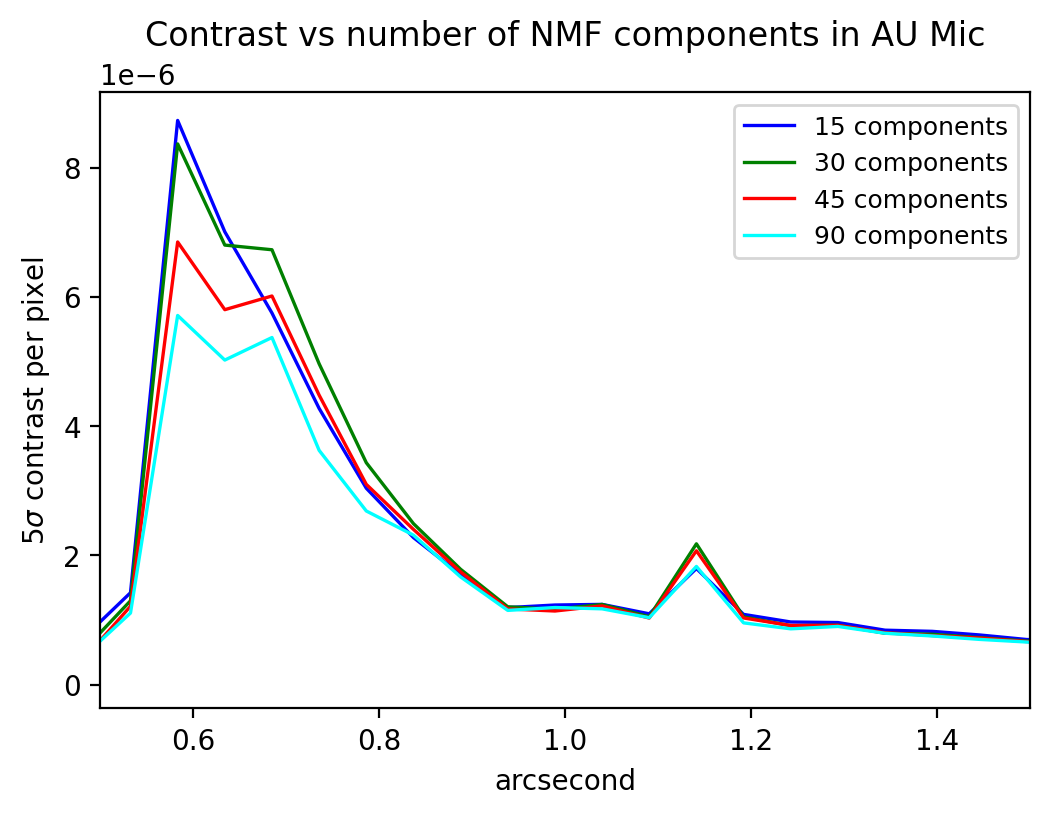

In [174]:
plt.figure(figsize=[6,4],dpi=200)

ax=plt.subplot(111)

ax.plot(nmf_15_std[0],sigma*nmf_15_std[1]/counts_bright_pixel ,'-',label='15 components',color="blue",linewidth=1.2)
ax.plot(nmf_30_std[0],sigma*nmf_30_std[1]/counts_bright_pixel ,'-',label='30 components',color="green",linewidth=1.2)
ax.plot(nmf_45_std[0],sigma*nmf_45_std[1]/counts_bright_pixel ,'-',label='45 components',color="red",linewidth=1.2)
ax.plot(nmf_90_std[0],sigma*nmf_90_std[1]/counts_bright_pixel ,'-',label='90 components',color="cyan",linewidth=1.2)

#ax.set_yscale('log')
plt.legend(loc="upper right",fontsize=9)
#ax.set_yticks([1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6])
plt.xlabel("arcsecond")
plt.ylabel("%i$\sigma$ contrast per pixel"%sigma)
ax.set_xlim([0.5,1.5])
plt.title("Contrast vs number of NMF components in AU Mic")
#ax.set_ylim([1e-3,1e-4])#Default [1e-9,1e-6] for the rest to work 

In [10]:
import configparser

In [11]:
config = configparser.ConfigParser()

In [20]:
config.read('config.ini')
config.get('fileinfo', 'trgdir')

'testfiles/'

In [22]:
config.get('compfacs', 'ncores')

'94'